# 階層集群(Hierarch)

In [50]:
import pandas as pd
import numpy as np

# 集群套件
from sklearn.cluster import KMeans, AgglomerativeClustering  # sklearn 套件集群分析
from scipy.cluster import hierarchy                          # scipy 套件集群分析 有(樹圖)
from sklearn.metrics import silhouette_score


In [40]:
# 從網址上下載資料，注意此資料集沒有 Header
single_clu = pd.read_csv('https://cs.uef.fi/sipu/datasets/spiral.txt', sep = '\t', 
                          header = None,
                         names = ['Col_1', 'Col_2', 'Cluster'])

In [41]:
df = single_clu.copy()

In [ ]:
# Sklearn 集群套件參數
'''
AgglomerativeClustering(
    n_clusters=2,                 # 分幾群
    *,
    affinity='euclidean',         # 距離
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',               # 分群方式
    distance_threshold=None,
)
'''

In [68]:
# 集群模型設定
skclu = AgglomerativeClustering(n_clusters=3, linkage='single') # 階層式
kmclu = KMeans(n_clusters=3)                                    # 集群式

In [69]:
# 建模
skclu.fit(df.iloc[:,0:2])
kmclu.fit(df.iloc[:,0:2])

KMeans(n_clusters=3)

In [70]:
# 輪廓係數
print('Hierarch = ',silhouette_score(df.iloc[:,0:2], skclu.labels_))
print('KMean = ', silhouette_score(df.iloc[:,0:2], kmclu.labels_))

Hierarch =  0.0013442973442779936
KMean =  0.3600708262059593


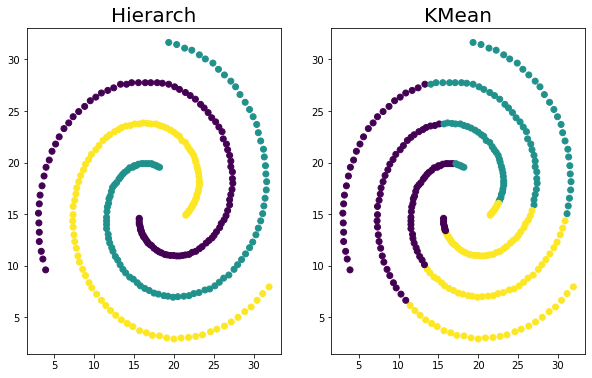

In [75]:
# 繪圖比較 (階層式 & 集群式)

plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title('Hierarch', size = 20)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = skclu.labels_)


plt.subplot(1,2,2)
plt.title('KMean', size = 20)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kmclu.labels_)

plt.show()

# 繪製階層式樹圖

In [ ]:
'''
hierarchy.linkage(
    y,                                 # 資料集
    method='single',                   # 階層方法
    metric='euclidean',                # 距離
    optimal_ordering=False,
)

'''

In [76]:
result = hierarchy.linkage(df.iloc[:,0:2], method='single')

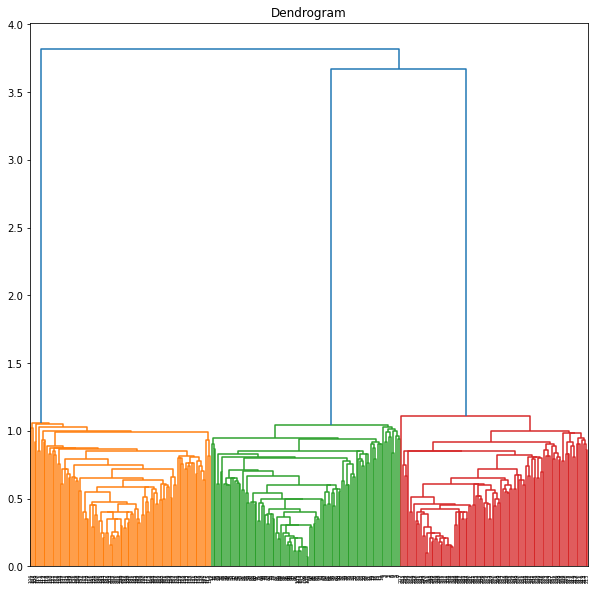

In [79]:
plt.figure(figsize=[10,10])

plt.title('Dendrogram')
hierarchy.dendrogram(result)

plt.show()